In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 120,
    "figure.figsize": (10, 6)
})

In [ ]:
# 1. Read all three JSON Lines files
df1 = pd.read_json("test-codalab-10k.data.jl", lines=True) # Remember that 85% of this has been labelled as "dummy"
df2 = pd.read_json("train.data.jl", lines=True)
df3 = pd.read_json("trial.data.jl", lines=True)
df4 = pd.read_json("validation.data.jl", lines=True)

df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Extract the text from te dictionaries
df = pd.DataFrame({
    "id": df["id"],
    "word": df["word"],
    "text_1": df["tweet1"].apply(lambda x: x["text"]),
    "date_1": df["tweet1"].apply(lambda x: x["date"]),
    "text_2": df["tweet2"].apply(lambda x: x["text"]),
    "date_2": df["tweet2"].apply(lambda x: x["date"]),
})


labels_1 = pd.read_csv("test.gold.tsv", sep="\t", header=None)
labels_2 = pd.read_csv("train.labels.tsv", sep="\t", header=None)
labels_3 = pd.read_csv("trial.gold.tsv", sep="\t", header=None)
labels_4 = pd.read_csv("validation.labels.tsv", sep="\t", header=None)

labels = pd.concat([labels_1, labels_2, labels_3, labels_4], ignore_index=True)
labels.columns = ["id", "changed"]


df = df.merge(labels[["id", "changed"]], on="id", how="right")

3317

In [ ]:
counts = df["changed"].value_counts(normalize=True).sort_index()*100

# Plot
plt.figure(figsize=(6, 4))
plt.bar(counts.index.astype(str), counts.values, color=["steelblue", "orange"])

for i, v in enumerate(counts):
    plt.text(i, v + 0.6, f"{v:.1f}%", ha="center")

# Labels and title
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
plt.title("Distribution of classes")
plt.xticks([0, 1], ["Not changed", "Changed"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

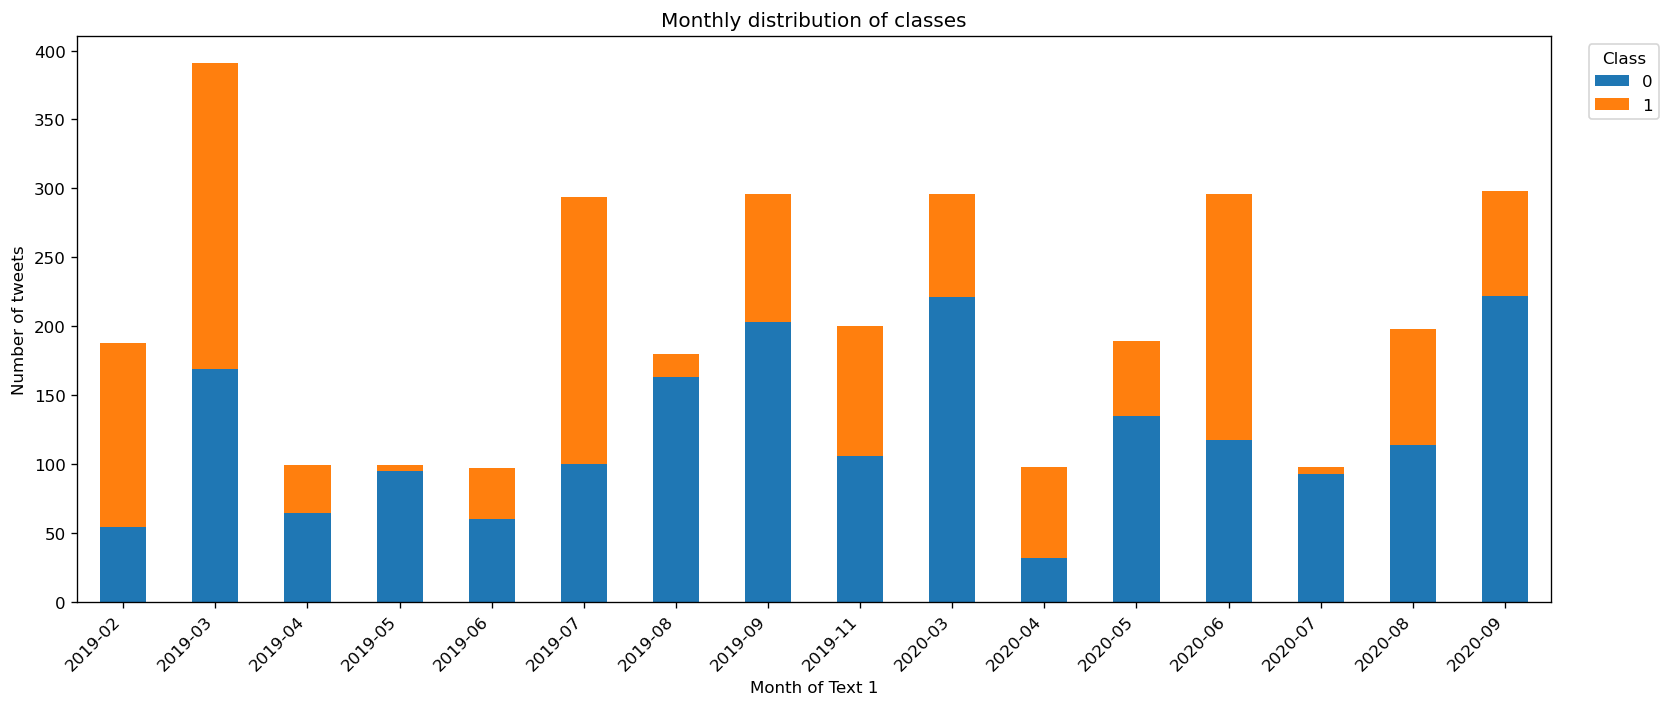

In [47]:
monthly_counts = df.groupby(["date_1", "changed"]).size().unstack(fill_value=0).sort_index()
monthly_counts.plot(kind="bar", stacked=True, figsize=(14, 6))

plt.title("Monthly distribution of classes")
plt.xlabel("Month of Text 1")
plt.ylabel("Number of tweets")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

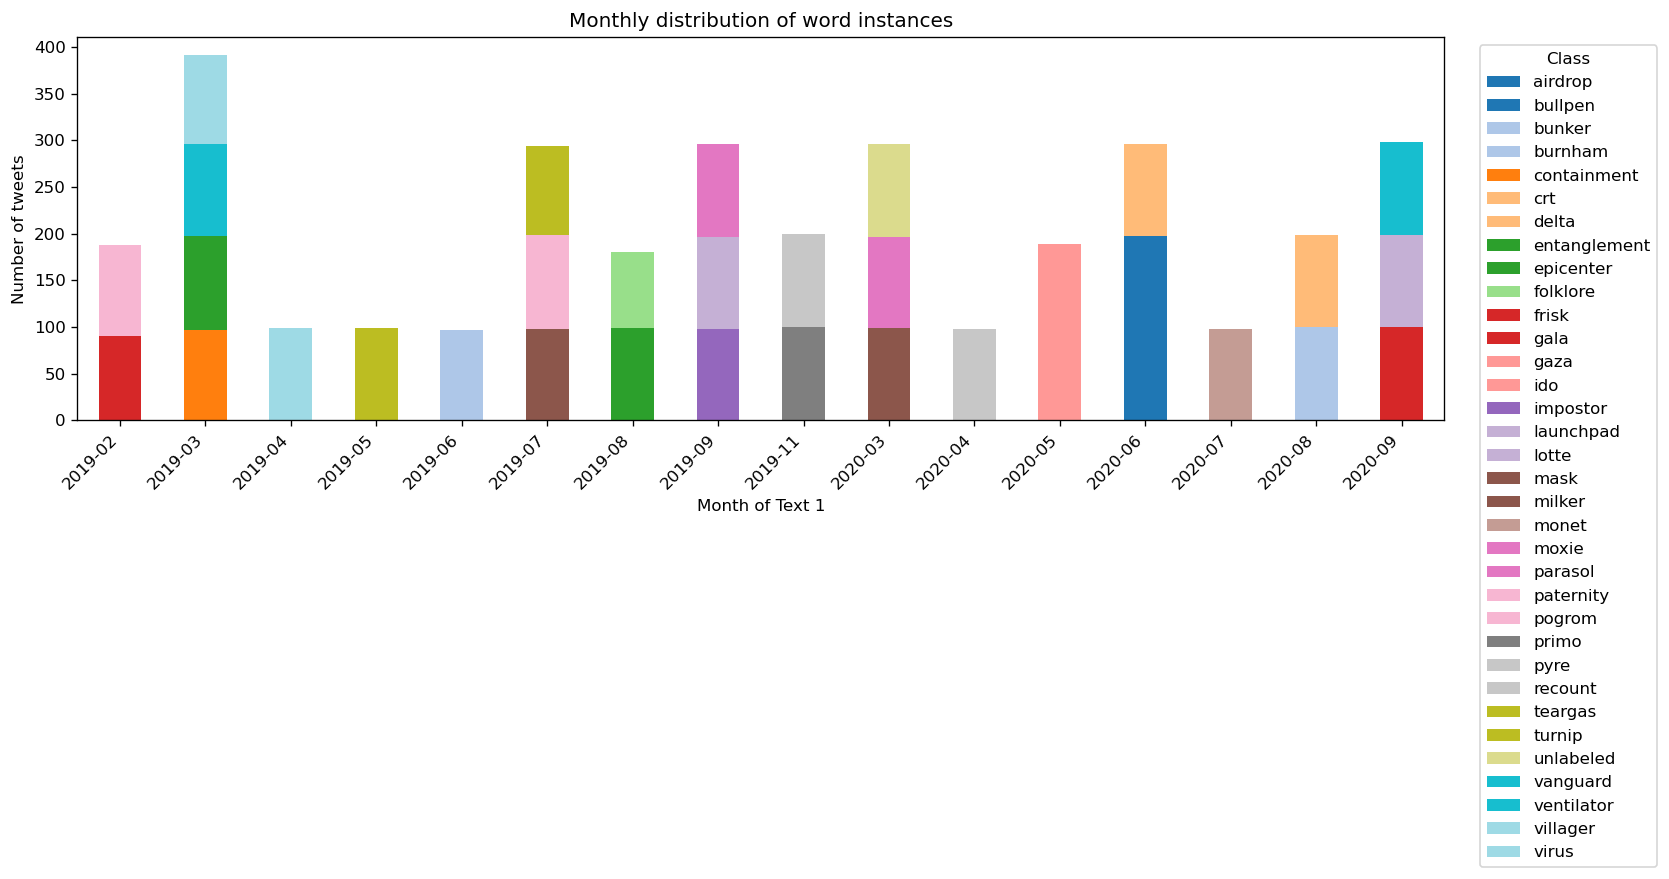

In [49]:
monthly_counts = df.groupby(["date_1", "word"]).size().unstack(fill_value=0).sort_index()
monthly_counts.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="tab20")

plt.title("Monthly distribution of word instances")
plt.xlabel("Month of Text 1")
plt.ylabel("Number of tweets")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()